# P05 - Spectral Analysis - Solutions 

In [1]:
# Execute this first!
%matplotlib inline
from pathlib import Path
import matplotlib
matplotlib.rc('font', size=8)  # adjust font size of plot
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import rcParams
rcParams["figure.subplot.hspace"] = (0.4)
rcParams["figure.figsize"] = (14, 9)
rcParams["axes.labelsize"] = (15)
rcParams["axes.titlesize"] = (20)
rcParams["font.size"] = (12)

## Exercise 1: Spectral analysis

In this exercise we want to analyse the different parameters that are important in Fourier Analysis. We generate a simple sinusoidal signal in the time domain and analyze its spectral content in the frequency domain applying a
Fourier Transform. Save some of the plots that illustrate the important points and problems that can arise.

Execute the following code and answer the following questions. For most sub questions you want to go back to the original settings before playing around with other parameters.

a) Describe what the Fourier Transform is illustrating in this example.

<span style="color:blue">*Answer: The FT shows a single peak at 2.0 Hz, illustrating the frequency content of the input time series.*</span>

b) Change the windowing function used in the taper. Can you see a difference using different taper functions? Can you see the main- and side-lobes of the spectral leakage? Now use zero-padding and a logarithmic scaling for the y-Axis in the plot. Again describe the changes you see now using different taper functions.

<span style="color:blue">*Answer: With the original settings, it is not possible to see the side lobes of the frequency peak clearly and hard to judge differences between the various window functions. When increasing the sample spacing in the frequency domain by using zero padding (e.g. 10 times the signal length) and switching to a logarithmic scaling on the y-Axis, the side lobes can be seen clearly. When comparing different windowing functions, we can see that some have a narrower main lobe (i.e. better resolution in frequency) but they also show higher side lobe amplitudes (i.e. they have less dynamic range). So the choice of window function mainly depends on whether it is more important to distinguish close frequency peaks or rather be able to see frequency peaks with much lower amplitudes than others.*</span>

**Keep some zero padding for the rest of the exercise to be able to see the mentioned effects and keep logarithmic scale on y-axis.**

c) Change the number of wavelengths in the time series `number_of_wavelengths` to different values. Run the program again, describe and explain the effect.

<span style="color:blue">*Answer: Adding more data sharpens the peak, reducing input signal length broadens it.*</span>

d) Change the sampling rate `sampling_rate` of the time series to different values. Run the program again, describe and explain the effect. Hint: When lowering the sampling rate, use higher `number_of_wavelengths` to have a longer input signal timeseries.

<span style="color:blue">*Answer: Provided you are sampling above the Nyquist frequency, changing the sample spacing makes no significant difference, the real frequency can still be resolved. When dropping below Nyquist frequency, we get a frequency peak that is not at the frequency of the input signal, leading us to a wrong interpretation of the input frequency content.*</span>

e) Change the percentage of tapering `taper_percentage` to different values. Run the program again, describe and explain the effect.

<span style="color:blue">*Answer: In cases where there is several wavelengths of the sinusoid, increasing the taper reduces effects of sudden discontinuties and non-periodicity and therefore the side lobes are weaker and there is less spectral leakage. However, large increases to the taper reduce the amount of actual data / energy within the window, and reduces the amplitude of the central peak and also widens the central peak*</span>

f) Uncomment the line that adds two more sinusoidal signals with different frequencies to your time series. Describe the changes you see in time domain and frequency domain. Describe the characteristics of the spectral content that you can make out especially when using different windowing functions.

<span style="color:blue">*Answer: In the time domain we can see that there are two very close frequencies since we see the characteristic 'beat' in the time series. We can not however see the third frequency that was added because it is much lower amplitude than the other two.
In the frequency domain what we can make out depends very much on the choice of windowing function. If we do not do any windowing (i.e. implicit boxcar window: best frequency resolution but very high side lobes) we are just able to make out the two close-by frequencies as individual peaks but we can not see the third frequency, because it is hidden in the strong side lobes of the two other frequencies. On the other hand, if we use a window that has a good dynamic range (e.g. `hann`) we can even make out the third frequency that has a much lower amplitude but we lose frequency resolution and can not distinguish the two individual peaks of the close-by strong frequencies.* </span>

g) Summarize how the different parameters in the Fourier Transform in general (as seen in these exercises) interact in the spectral estimation. What problems can arise? What connections between the different parameters do you have to keep in mind?

<span style="color:blue">*Answer: For good results, keep the length of the data signal as long as possible. Use a sampling rate that is high enough to capture the signal you are interested in. Keep in mind that a high sampling rate and lots of data points are required to distinguish spectral peaks which are close together. Use a taper to avoid artifacts from discontinuities at start/end of signal. Do not allow the taper to significantly reduce the amount of data you have. The choice of tapering function is about whether it is more important to have good resolution in frequency space (i.e. be able to resolve near identical frequency peaks as individual peaks) or to have good dynamic range (i.e. be able to recognize signals with very different amplitudes). Also remember that you may need to increase the number of data points in order to reduce the sample spacing in frequency domain, either by zero-padding (only interpolates, no new information added) or taking a longer signal window (improves actual frequency resolution but degrades localization of spectrum in time).*</span>

h) Add noise to the signal (uncomment the lines where is says so). Explain what you see in time domain and frequency domain.

<span style="color:blue">*Answer: In the time domain, there is still a sinusoid with a single periodicity, but it is difficult to see because of the random noise. (You may also have a second sinusoid, if you have left that in your code.) In the frequency domain, it is still very easy to see the dominant peak(s).*</span>

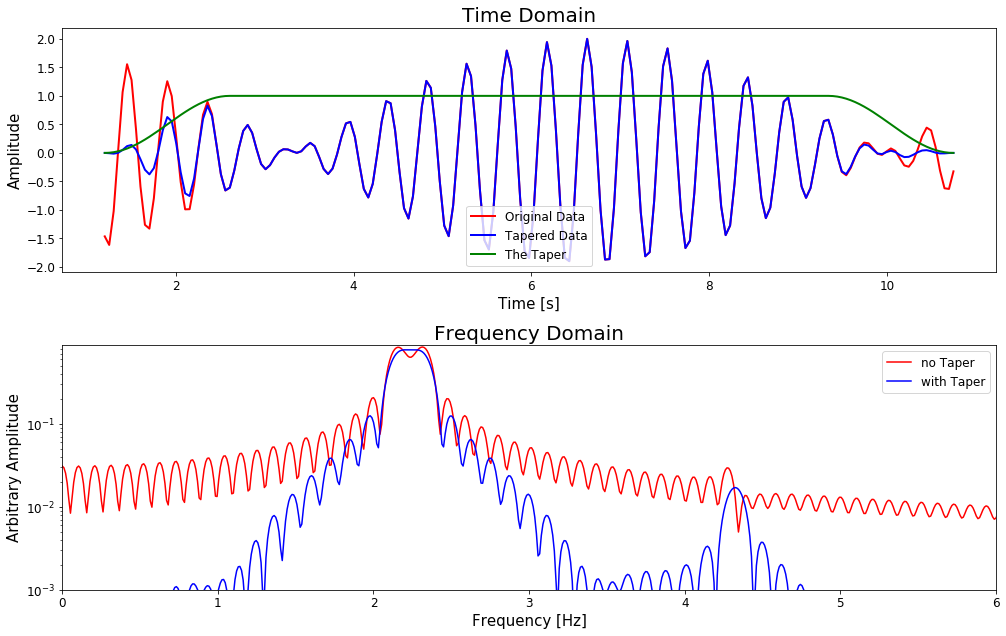

In [2]:
# Code Block 1
# -*- coding: utf-8 -*-
from scipy.signal.windows import get_window
from obspy.signal.invsim import cosine_taper 


# Number of wavelengths in the signal,
# higher values will make a longer input signal
number_of_wavelenghts = 20.6  # original value: 10.6 

# sampling rate
sampling_rate = 20.0  # original value: 20 Hz  (dt: 50 milliseconds)
dt = 1.0 / sampling_rate

# Set generator frequency / frequency of signal (in Hz)
f = 2.15  # original value: 2.15

# secondary generator frequencies
f2 = f * 1.07
f3 = f * 1.5


npts = int(sampling_rate * number_of_wavelenghts / f)

x = np.linspace(0.0, npts * dt, npts) + 1.2  # time of samples in seconds


# Generate sine wave with generator frequency f 
y = np.sin(f * 2.0 * np.pi * x)

# to add more sinusoids to the signal
# uncomment the following line
y = y + np.sin(f * 1.07 * 2.0 * np.pi * x) + 2e-2 * np.sin(f * 2.0 * 2.0 * np.pi * x)

# to add noise to the signal
# uncomment the following two lines:
#noise_amplitude = 0.8
#y = y + np.random.randn(len(y)) * noise_amplitude

# Percentage of tapering applied to signal, value between 0.0 and 1.0
taper_percentage = 0.3  # original value: 0.1
taper = cosine_taper(npts, taper_percentage)

# switch out the used tapering function here (should be same length as the signal),
# by switching out the `taper` variable with a window function generated from scipy or numpy:
#  - https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.windows.get_window.html
#  - e.g. https://docs.scipy.org/doc/numpy/reference/generated/numpy.hanning.html
# for scipy's get_window() possible options include:
#      boxcar, triang, blackman, hamming, hann, bartlett, flattop
#taper = get_window('hamm', npts)
#taper = get_window('boxcar', npts)
#taper = get_window('hann', npts)

# Taper signal
y_taper = y * taper

# Use next line to use zero-padding,
# e.g. set `zero_padding = 10` to append 10 times the length of the signal
# in zeros before calculating the FT
zero_padding = 10  # original value: 1  (no zero padding)

# Do the Fast Fourier Transformation for Real valued data
#y = np.concatenate((y, np.zeros(npts * zero_padding)))
fy = np.fft.rfft(y, n=npts * zero_padding)
fy_taper = np.fft.rfft(y_taper, n=npts * zero_padding)


# Set up the plots
xf = np.linspace(0.0, 1.0 / (2.0 * dt), (npts * zero_padding // 2) + 1)

plt.subplot(211)
plt.title('Time Domain')
plt.plot(x, y, label="Original Data", color='r', linewidth=2)
plt.plot(x, y_taper, label="Tapered Data", color='b', linewidth=2)
plt.plot(x, taper, label="The Taper", color='g', linewidth=2)
plt.legend(loc='lower center')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(212)
plt.title('Frequency Domain')
plt.plot(xf, 2.0/npts * np.abs(fy), color='r', label="no Taper")
plt.plot(xf, 2.0/npts * np.abs(fy_taper), label="with Taper", color='b')
plt.legend()
plt.xlabel('Frequency [Hz]')
plt.ylabel('Arbitrary Amplitude')
plt.tight_layout()

# focus on a part of the frequency spectrum 
# (uncomment the next line and set suitable values)
plt.xlim(0, 6)

# uncomment the next lines to show spectrum in logarithmic scale
# and zoom in appropriately
plt.ylim(bottom=1e-3)
plt.gca().set_yscale('log')

## Exercise 2: Display the Earth's Eigenmodes Excited by a Great Earthquake

In this exercise we load a ~43 hours seismogram record of a magnitude 8.0 earthquake in central China (sampled at 1 Hz). Doing a Fourier transform we can study the eigenmodes of the Earth excited by this earthquake. You should control two parameters: The length of the seismogram record used in the Spectral Estimation and the amount of zeros padded before applying the Fourier transform.

Execute the following code and answer the following questions:

a) The plot shows the spectra of the data. The vertical lines in the plot are from analytically computed eigenmodes. Comment on how well the spectra match the analytically calculated eigenmodes. (Comment the last line to view the full frequency range)

<span style="color:blue">*Answer: Initially, the analytically computed eigenmodes should be a good match to the eigenmodes you compute from the data.*</span>

b) Change the length of the seismogram record used in the FFT (*hours_used*) and describe the changes in the Spectral Estimation with the length of the seismogram.

<span style="color:blue">*Answer: Good results are given when using around 30 hours. The peaks are sharpest and frequencies which are close to each other can be resolved. Using only a few hours of data gives a very poor result.*</span>

c) Reset the `hours_used` to 10 (or even lower) and modify the number of zeros which are padded for the FFT. (Use the parameter `n`). Describe the changes in the Spectral Estimation with the number of zeros padded.

<span style="color:blue">*Answer: If you reduce the overall length of the record, you are reducing the amount of data you have. It may still look as smooth, but it has lower real frequency resolution. 
Padding zeros above the amount of data will increase the number of points you have in the time domain and improve the smoothness of the final plot. However, adding zeros without adding data will improve the smoothness of the plot, without changing the actually achievable resolution. It is possible to see the most prominant eigenmode peaks though with less data then before.*</span>

d) Try to get an optimal display of the Eigenmodes by adjusting these two parameters.

<span style="color:blue">*Answer: I found the best results from using around 30 hours of data and padding data around this. (Note - if you pad zeros until you have a power of 2 data points, the calculation will be more computationally efficient.)*</span>

`hours_used = 30`

`n = 2**17`

<span style="color:blue">*More than about 30 hours gave points that were very close together and gave a noisy looking spectrogram. Of course, if you are interested in distinguishing peaks very close together, this may be useful.*</span>

GR.FUR..LHE | 2008-05-12T05:15:12.640000Z - 2008-05-13T11:15:12.640000Z | 1.0 Hz, 108001 samples
Length of data record: 108001
Total number of points after zero padding: 1080010


(0.002, 0.005)

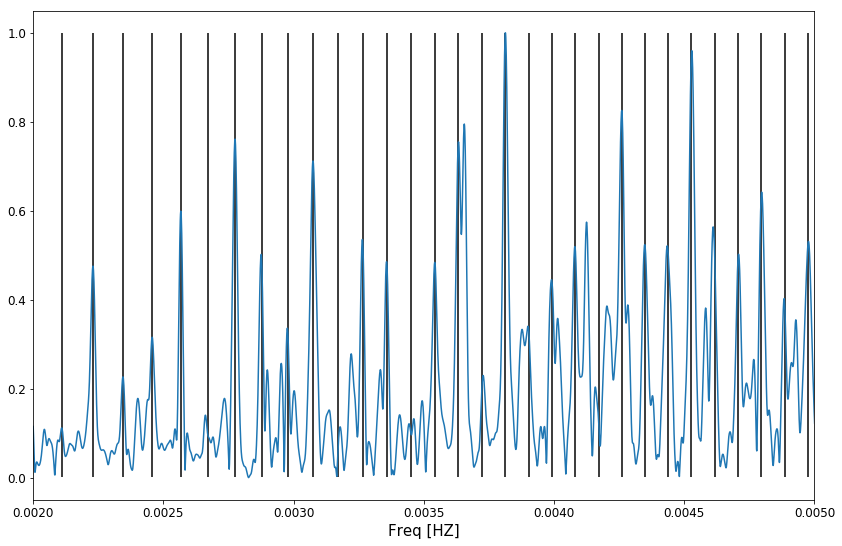

In [3]:
# Code Block 2 
# -*- coding: utf-8 -*-
from obspy import read


# Load data
data_dir = Path('data')
st = read(str(data_dir / "GR.FUR..LHE.D.2008.133"))
st += read(str(data_dir / "GR.FUR..LHE.D.2008.134"))
st.merge()
tr = st[0]

# cut length of seismogram
# maximum length is approximately 43
hours_used = 30  # initial value: 20
t_end = tr.stats.starttime + hours_used * 3600
tr.trim(endtime=t_end)
print(tr)

# preprocessing
df = tr.stats.sampling_rate
npts = tr.stats.npts

tr.detrend('linear')  # detrend
# apply windowing function to ensure the real waveform data 
# starts and ends at zero
tr.data *= np.hanning(npts)

# n: int, optional
# Number of points along transformation axis in the input to use. 
# If n is smaller than the length of the input, the input is cropped. 
# If it is larger, the input is padded with zeros. If n is not given, the 
# length of the input along the axis specified by axis is used.

# define the total length of the record
# original:   n = int(len(tr.data) * 1.0)
#     ..for no zero padding
#  use e.g. 10.0 at the end for padding to 10x length of input record 
n = int(len(tr.data) * 10.0)

print ('Length of data record:', len(tr.data))
print ('Total number of points after zero padding:', n)

# Do the fourier transform
fdat = np.fft.rfft(tr.data, n=n)

# Load the eigenmodes
# eigen = np.loadtxt(os.path.join(pracDir, "eiglst.txt"), 
#                    usecols=[0,1,2,3], converters={1: lambda s: s == "S" and True or False})

# Load the eigenmodes
# (np.loadtxt method to load the eigenmodes has been rewritten, 
# because I had trouble with it reading in strings as bytes in Python 3)
list_e = []
with open(data_dir / "eiglst.txt") as f:
    # skip first 5 lines    
    f.readline()
    f.readline()
    f.readline()
    f.readline()
    f.readline()
    for line in f.readlines():
        a, b, c, d = line.split()[0:4]
        if b == 'S':
            b = 1.
        else:
            b = 0.
        a, b, c = float(a), float(b), float(c)
        list_e.append([a, b, c, d])

        
eigen = np.array(list_e, dtype='float')

# load only the S part
ind1 = eigen[:,1].astype(bool)
ind2 = eigen[:,0]
ind = ((ind2 == 0) & ind1)  # bitwise comparing for bool arrays
modes = eigen[ind,3] / 1000  # normalize, freq given in mHz

# Take the first 2% only
N = len(fdat) * 0.02
N = int(N)
freq = np.linspace(0, df/2, len(fdat))
freq = freq[1:N+1]  # zero frequency is offset
fdat = fdat[1:N+1]
fdat /= abs(fdat).max()  # normalize to 1

# Plot the results

plt.figure()
plt.plot(freq, abs(fdat))
plt.vlines(modes[0:len(modes)//2], 0.001, 1)
plt.xlabel('Freq [HZ]')

# use e.g. something like this to zoom in:
plt.xlim(0.002, 0.005)
